In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [333]:
df=pd.read_csv('netflix_titles.csv')

In [334]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [335]:
df.shape

(6234, 12)

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [337]:
# No. of unique values in our data
for i in df.columns:
    print(i, ':', df[i].nunique())

show_id : 6234
type : 2
title : 6172
director : 3301
cast : 5469
country : 554
date_added : 1524
release_year : 72
rating : 14
duration : 201
listed_in : 461
description : 6226


In [160]:
# Checking null values in every column of our data
(df.isnull().sum()/len(df))*100

show_id          0.000000
type             0.000000
title            0.000000
director        31.584857
cast             9.143407
country          7.635547
date_added       0.176452
release_year     0.000000
rating           0.160411
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


there are enough null values, we cant directly remove the rows. so we need to do missing values imputation

In [68]:
df.duplicated().sum()

1

In [70]:
df.drop_duplicates(inplace=True)

## Challenges :
#### 1. Unnest the cast, director, listed_in, country column
#### 2. Make Duration from string to int
#### 3. Missing Values
#### 4. convert dateadded to datetime format and extract month, week etc
#### 5. No numerical variable so that we can do quantitative analysis

In [6]:
# Unnesting Cast Column:
# 1. Without using any shortcut
# 2. Using Melt
# 3. Using Split(, ) + Stack 
# As there are multiple varibales (cast,country,listed_in, so we can make a function

In [37]:
# Technique 1 for unnesting

cast=[]
show_id=[]
def func(row):
    for i in str(row.cast).split(", "):
        cast.append(i)
        show_id.append(row.show_id)

data=df
data.apply(func, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
6229    None
6230    None
6231    None
6232    None
6233    None
Length: 6234, dtype: object

In [38]:
cast_df=pd.DataFrame({'Show_id':show_id ,'Cast' : cast})

In [48]:
cast_df.set_index('Show_id', inplace=True)

In [49]:
df.set_index('show_id', inplace=True)

In [53]:
df.join(cast_df, how='inner')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Cast
247747,Movie,Amar Akbar Anthony,Manmohan Desai,"Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, ...",India,"December 31, 2019",1977,TV-14,172 min,"Action & Adventure, Classic Movies, Comedies","Abandoned in a park by their father, Amar, Akb...",Vinod Khanna
247747,Movie,Amar Akbar Anthony,Manmohan Desai,"Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, ...",India,"December 31, 2019",1977,TV-14,172 min,"Action & Adventure, Classic Movies, Comedies","Abandoned in a park by their father, Amar, Akb...",Rishi Kapoor
247747,Movie,Amar Akbar Anthony,Manmohan Desai,"Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, ...",India,"December 31, 2019",1977,TV-14,172 min,"Action & Adventure, Classic Movies, Comedies","Abandoned in a park by their father, Amar, Akb...",Amitabh Bachchan
247747,Movie,Amar Akbar Anthony,Manmohan Desai,"Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, ...",India,"December 31, 2019",1977,TV-14,172 min,"Action & Adventure, Classic Movies, Comedies","Abandoned in a park by their father, Amar, Akb...",Neetu Singh
247747,Movie,Amar Akbar Anthony,Manmohan Desai,"Vinod Khanna, Rishi Kapoor, Amitabh Bachchan, ...",India,"December 31, 2019",1977,TV-14,172 min,"Action & Adventure, Classic Movies, Comedies","Abandoned in a park by their father, Amar, Akb...",Parveen Babi
...,...,...,...,...,...,...,...,...,...,...,...,...
81235729,Movie,Jezebel,Numa Perrier,"Tiffany Tenille, Numa Perrier, Stephen Barring...",United States,"January 16, 2020",2019,TV-MA,86 min,"Dramas, Independent Movies","During the internet's infancy, a vulnerable wo...",Jessa Zarubica
81235729,Movie,Jezebel,Numa Perrier,"Tiffany Tenille, Numa Perrier, Stephen Barring...",United States,"January 16, 2020",2019,TV-MA,86 min,"Dramas, Independent Movies","During the internet's infancy, a vulnerable wo...",RiRia
81235729,Movie,Jezebel,Numa Perrier,"Tiffany Tenille, Numa Perrier, Stephen Barring...",United States,"January 16, 2020",2019,TV-MA,86 min,"Dramas, Independent Movies","During the internet's infancy, a vulnerable wo...",Charlie Taylor
81235729,Movie,Jezebel,Numa Perrier,"Tiffany Tenille, Numa Perrier, Stephen Barring...",United States,"January 16, 2020",2019,TV-MA,86 min,"Dramas, Independent Movies","During the internet's infancy, a vulnerable wo...",Amy Aitken


In [54]:
# Technique 2 for unnesting

constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist() 
df_new1=pd.DataFrame(constraint, index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0: 'cast'},inplace=True) 
df_new1.drop(['level_1'], axis=1, inplace=True)
df_new1.head()

,title,cast
0,Norm of the North: King Sized Adventure,Alan Marriott
1,Norm of the North: King Sized Adventure,Andrew Toth
2,Norm of the North: King Sized Adventure,Brian Dobson
3,Norm of the North: King Sized Adventure,Cole Howard
4,Norm of the North: King Sized Adventure,Jennifer Cameron


In [55]:
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist() 
df_new2=pd.DataFrame(constraint, index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0: 'listed_in'},inplace=True) 
df_new2.drop(['level_1'], axis=1, inplace=True)
df_new2.head()

,title,listed_in
0,Norm of the North: King Sized Adventure,Children & Family Movies
1,Norm of the North: King Sized Adventure,Comedies
2,Jandino: Whatever it Takes,Stand-Up Comedy
3,Transformers Prime,Kids' TV
4,Transformers: Robots in Disguise,Kids' TV


In [57]:
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist() 
df_new3=pd.DataFrame(constraint, index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0: 'director'},inplace=True) 
df_new3.drop(['level_1'], axis=1, inplace=True)
df_new3.head()

,title,director
0,Norm of the North: King Sized Adventure,Richard Finn
1,Norm of the North: King Sized Adventure,Tim Maltby
2,Jandino: Whatever it Takes,nan
3,Transformers Prime,nan
4,Transformers: Robots in Disguise,nan


In [58]:
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist() 
df_new4=pd.DataFrame(constraint, index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0: 'country'},inplace=True) 
df_new4.drop(['level_1'], axis=1, inplace=True)
df_new4.head()

,title,country
0,Norm of the North: King Sized Adventure,United States
1,Norm of the North: King Sized Adventure,India
2,Norm of the North: King Sized Adventure,South Korea
3,Norm of the North: King Sized Adventure,China
4,Jandino: Whatever it Takes,United Kingdom


In [60]:
print(df_new1.shape)
print(df_new2.shape)
print(df_new3.shape)
print(df_new4.shape)

(44881, 2)
(13670, 2)
(6821, 2)
(7655, 2)


In [85]:
df1.drop(df1.index , inplace=True)
temp=pd.merge(df_new1, df_new2, on='title', how='inner') 
temp1=pd.merge(temp, df_new3, on='title', how='inner') 
temp2=pd.merge(temp1, df_new4, on='title', how='inner') 
df1=pd.merge(temp2, df[['type','title','date_added','release_year','rating','duration']], on='title', how='inner') 

Here we cannot handle missing values using mean,median, mode  as, for each movie, diirector will be different. Ex. if we compute mode as a hollywood director and replace it for Bollywood movie, then it will be incorrect

### So, instead we can use Mean Target Imputation of Missing Values
We will keep one comlumn constant and based on that, we will find the mode, median, mean
Ex. if a cast is missing. Then we will keep see its director and keep it constatnt(Karan Johar). then we will see which actor has worked mostly with Karan Johar(mode), then we will fill the mode in the missing cast
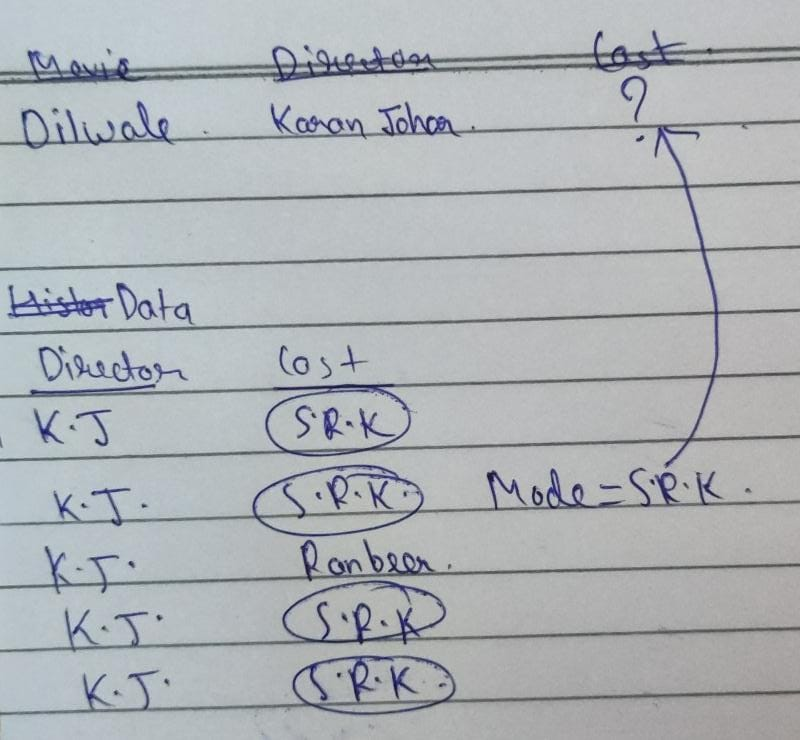

In [86]:
# for ths case, we are replacing nan values of director and actor by Unknown Actor and Director 
df1['cast'].replace(['nan'], ['Unknown Actor'], inplace=True)
df1['director'].replace(['nan'], ['Unknown Director'], inplace=True) 
df1['country'].replace(['nan'], [np.nan], inplace=True)
df1.head() 

,title,cast,listed_in,director,country,type,date_added,release_year,rating,duration
0,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,United States,Movie,"September 9, 2019",2019,TV-PG,90 min
1,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,India,Movie,"September 9, 2019",2019,TV-PG,90 min
2,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,South Korea,Movie,"September 9, 2019",2019,TV-PG,90 min
3,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,China,Movie,"September 9, 2019",2019,TV-PG,90 min
4,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Tim Maltby,United States,Movie,"September 9, 2019",2019,TV-PG,90 min


In [87]:
# convert type,country,listed_in,Rating to Category and release_year to int
# convert date_added to datetime
col=['type','country','listed_in','rating']
for i in col:
    df1[i]=df1[i].astype('category')

# converting date_added to datetime format
df1.date_added=pd.to_datetime(df1.date_added)

In [177]:
df1.date_added.dt.day_name()

0         Monday
1         Monday
2         Monday
3         Monday
4         Monday
           ...  
211462       NaN
211463       NaN
211464       NaN
211465       NaN
211466       NaN
Name: date_added, Length: 211467, dtype: object

In [183]:
# extract month and year from date_added
df1['added_year']=df1.date_added.dt.year
df1['added_month']=df1.date_added.dt.month
df1['added_week']=df1.date_added.dt.day_name()

In [184]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211467 entries, 0 to 211466
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   title           211467 non-null  object        
 1   cast            211467 non-null  object        
 2   listed_in       211467 non-null  category      
 3   director        211467 non-null  object        
 4   country         201348 non-null  category      
 5   type            211467 non-null  category      
 6   date_added      211261 non-null  datetime64[ns]
 7   release_year    211467 non-null  int64         
 8   rating          211347 non-null  category      
 9   duration        211467 non-null  object        
 10  added_year      211261 non-null  float64       
 11  added_month     211261 non-null  float64       
 12  added_week      211261 non-null  object        
 13  movie_duration  211467 non-null  int32         
 14  tv_duration     211467 non-null  int

In [185]:
df1.duration.value_counts()

1 Season     46275
2 Seasons     9506
3 Seasons     8804
98 min        5327
91 min        5117
             ...  
15 min           3
20 min           3
34 min           2
37 min           2
11 min           1
Name: duration, Length: 201, dtype: int64

In [186]:
## Divide tv shows and movie duration in different columns
df1['movie_duration']=df1.apply(lambda row: str(row.duration).split(' ')[0] if row.type=='Movie' else '0', axis=1)
df1['tv_duration']=df1.apply(lambda row: str(row.duration).split(' ')[0] if row.type=='TV Show' else '0', axis=1)
df1.movie_duration=df1.movie_duration.astype('int')
df1.tv_duration=df1.tv_duration.astype('int')

In [188]:
df1.head()

,title,cast,listed_in,director,country,type,date_added,release_year,rating,duration,added_year,added_month,added_week,movie_duration,tv_duration
0,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,United States,Movie,2019-09-09,2019,TV-PG,90 min,2019.0,9.0,Monday,90,0
1,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,India,Movie,2019-09-09,2019,TV-PG,90 min,2019.0,9.0,Monday,90,0
2,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,South Korea,Movie,2019-09-09,2019,TV-PG,90 min,2019.0,9.0,Monday,90,0
3,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,China,Movie,2019-09-09,2019,TV-PG,90 min,2019.0,9.0,Monday,90,0
4,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Tim Maltby,United States,Movie,2019-09-09,2019,TV-PG,90 min,2019.0,9.0,Monday,90,0


In [190]:
#Dropping unnecessary columns
df2=df1
df2=df2.drop(columns=['duration','date_added'])

In [191]:
df2.head()

,title,cast,listed_in,director,country,type,release_year,rating,added_year,added_month,added_week,movie_duration,tv_duration
0,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,United States,Movie,2019,TV-PG,2019.0,9.0,Monday,90,0
1,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,India,Movie,2019,TV-PG,2019.0,9.0,Monday,90,0
2,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,South Korea,Movie,2019,TV-PG,2019.0,9.0,Monday,90,0
3,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Richard Finn,China,Movie,2019,TV-PG,2019.0,9.0,Monday,90,0
4,Norm of the North: King Sized Adventure,Alan Marriott,Children & Family Movies,Tim Maltby,United States,Movie,2019,TV-PG,2019.0,9.0,Monday,90,0


In [193]:
# Dividing Movie and TV Show Data
df_movie=df2[df2.type=='Movie']
df_tv=df2[df2.type=='TV Show']

An error occurred while creating the line plot.


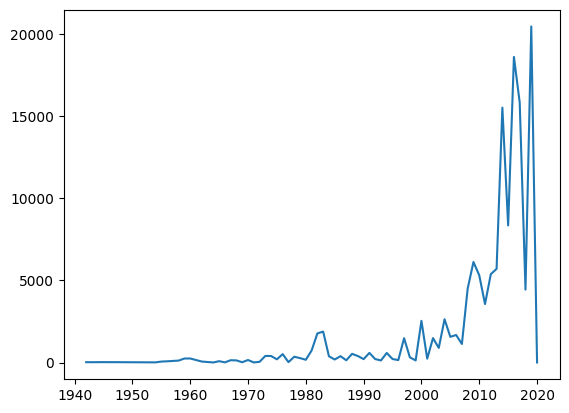

In [194]:
# Growth of movies per year
try:
    sns.lineplot(x=df_movie.release_year.unique(),y=df_movie.release_year.value_counts().values)
    plt.show()
except:
    print("An error occurred while creating the line plot.")

An error occurred while creating the line plot.


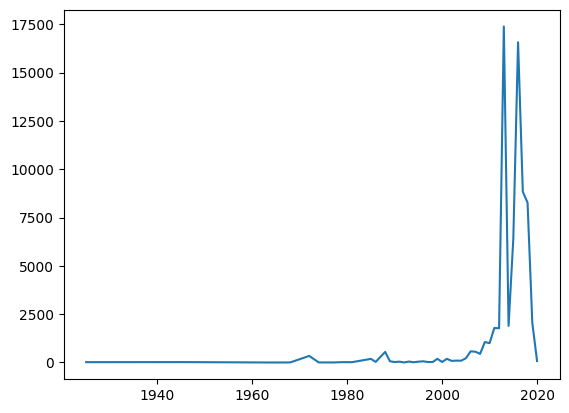

In [195]:
# Growth of TV Shows per year
try:
    x=df_tv.release_year.unique()
    y=df_tv.release_year.value_counts().values
    sns.lineplot(x=x,y=y)
    plt.show()
except:
    print("An error occurred while creating the line plot.")

We can see demand of both TV Shows/Movies after 2010 increased drastically

In [239]:
df2[df2.added_year>2010].type.value_counts()/df2[df2.added_year>2010].shape[0]

Movie      0.664007
TV Show    0.335993
Name: type, dtype: float64

#### In recent years, 67% Movies are released compared to 33% TV Shows

# Univariate Analysis

<AxesSubplot: xlabel='movie_duration', ylabel='Density'>

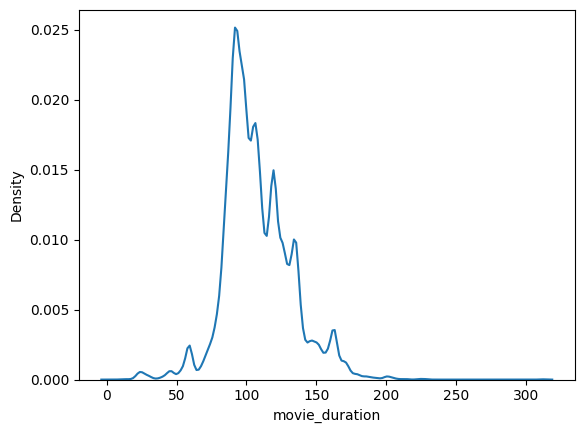

In [206]:
sns.kdeplot(data=df_movie,x='movie_duration')

### Most movies have 90-120 min duration

<AxesSubplot: xlabel='tv_duration', ylabel='Density'>

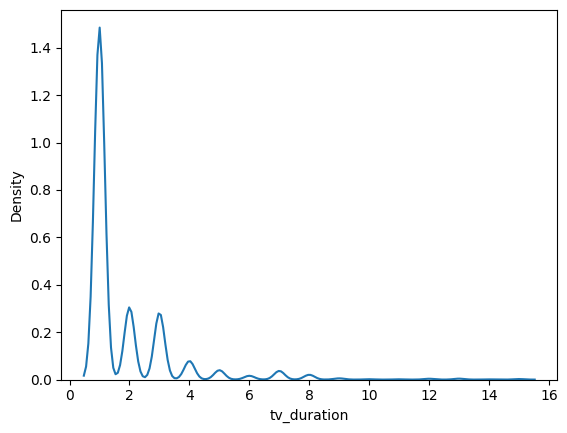

In [207]:
sns.kdeplot(data=df_tv,x='tv_duration')

### Most TV shows have 1-2 seasons

## Univariate Analysis in terms of count of each column

<BarContainer object of 10 artists>

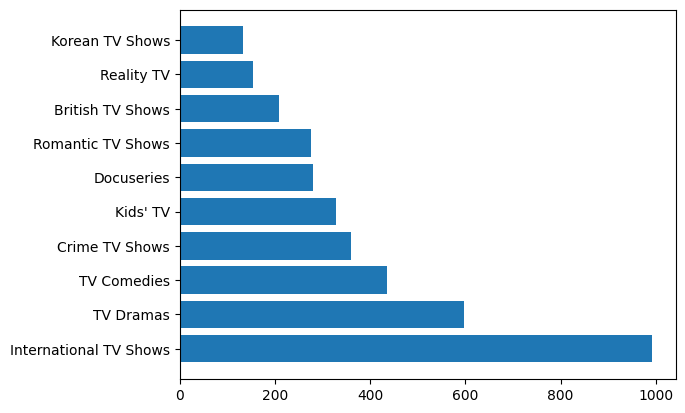

In [221]:
# No. of distinct titles on the basis on Listed_in
x=df_tv.groupby(df_tv.listed_in).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).head(10)
x.reset_index(inplace=True)
plt.barh(x['listed_in'],x['title'])

So, In recent years, Genre='International TV Shows, drama,crime,romantic' have the most TV Shows

<BarContainer object of 10 artists>

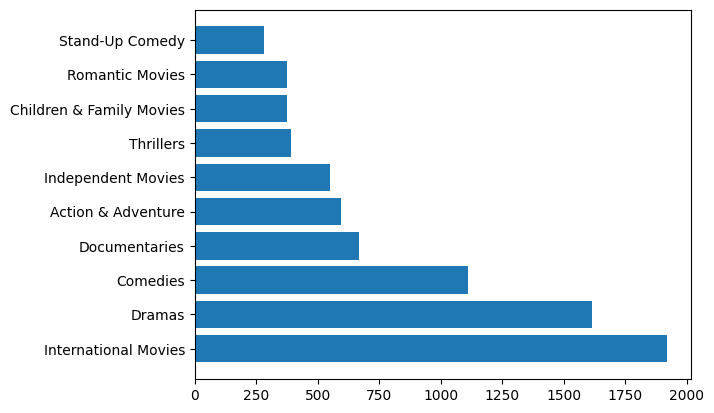

In [220]:
# No. of distinct titles on the basis on Listed_in
x=df_movie.groupby(df_movie.listed_in).agg({"title":"nunique"}).sort_values(by=['title'],ascending=False).head(10)
x.reset_index(inplace=True)
plt.barh(x['listed_in'],x['title'])

So, In recent years, Genre='International Movies, comedies,action,independent' have the most Movies

<BarContainer object of 7 artists>

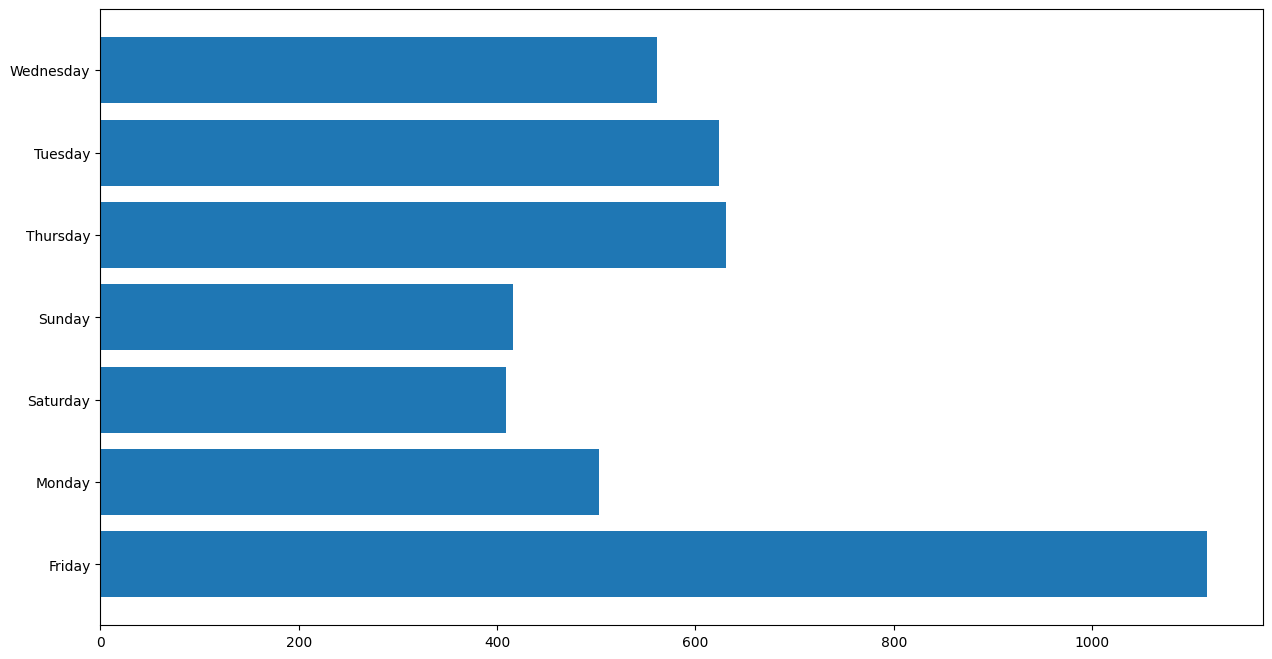

In [202]:
data=df_movie.groupby(df_movie.added_week).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
plt.barh(data['added_week'],data['title'])

<BarContainer object of 7 artists>

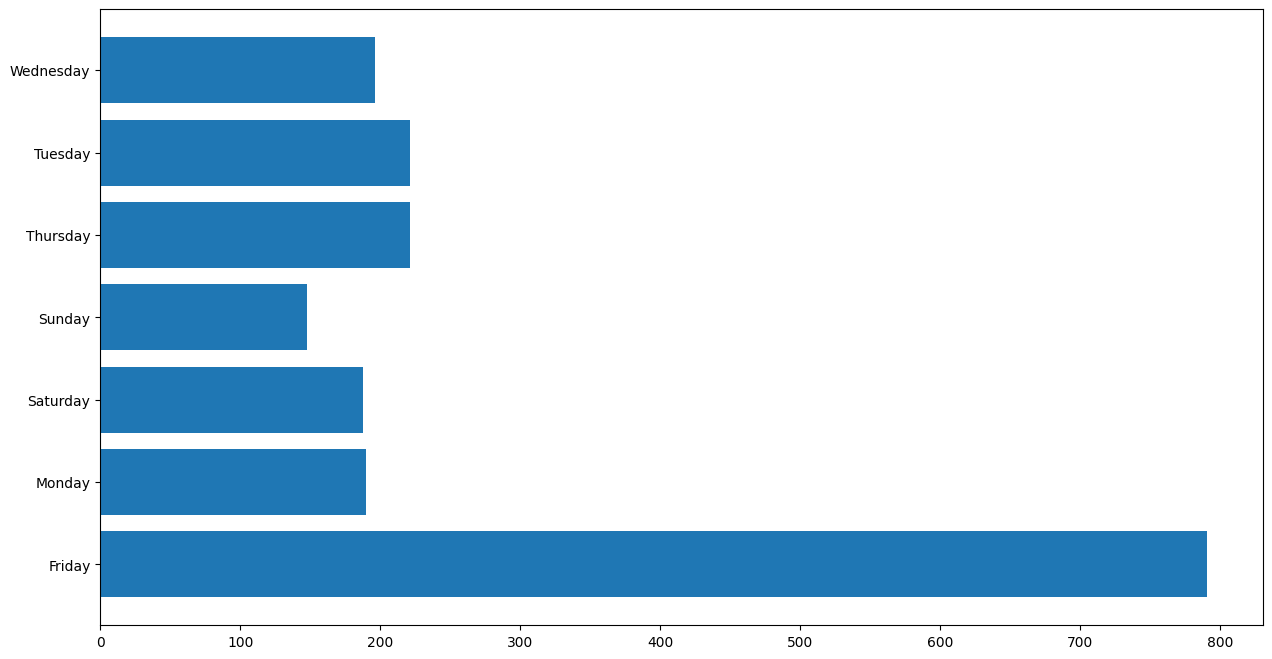

In [203]:
data=df_tv.groupby(df_tv.added_week).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
plt.barh(data['added_week'],data['title'])

### So, most movies / TV Shows release on friday

In [222]:
mov=df_movie.groupby(df_movie.country).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)
mov['title']=mov['title'].map(lambda r: r/mov.title.sum()*100)
mov

,country,title
105,United States,47.845579
38,India,19.402242
103,United Kingdom,9.489415
14,Canada,5.255293
29,France,5.031133
91,Spain,3.337484
31,Germany,3.138232
35,Hong Kong,2.316314
17,China,2.092154
58,Mexico,2.092154


In [219]:
mov=df_tv.groupby(df_tv.country).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)
mov['title']=mov['title'].map(lambda r: r/mov.title.sum()*100)
mov

,country,title
105,United States,43.459119
103,United Kingdom,14.150943
45,Japan,9.748428
89,South Korea,7.295597
14,Canada,6.855346
29,France,4.654088
97,Taiwan,4.088050
38,India,3.584906
4,Australia,3.144654
91,Spain,3.018868


### US and India alone contribute to 67% of Entire world movie releases
### US alone contribute to 43% of entire TV shows releases

In [227]:
mov=df_movie.groupby(df_movie.rating).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)
mov['title']=mov['title'].map(lambda r: r/mov.title.sum()*100)
mov

,rating,title
8,TV-MA,32.128322
6,TV-14,24.826430
5,R,12.090017
9,TV-PG,10.342351
4,PG-13,6.847019
2,NR,4.836007
3,PG,4.381135
7,TV-G,1.915250
11,TV-Y7,1.651903
10,TV-Y,0.981566


In [226]:
mov=df_tv.groupby(df_tv.rating).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)
mov['title']=mov['title'].map(lambda r: r/mov.title.sum()*100)
mov

,rating,title
8,TV-MA,34.472208
6,TV-14,33.605303
9,TV-PG,13.666497
10,TV-Y,5.201428
11,TV-Y7,5.099439
7,TV-G,3.518613
12,TV-Y7-FV,3.467619
2,NR,0.815910
5,R,0.101989
0,G,0.050994


### 68% TV shows and 57% movies are TV-MA and TV-14 rated


In [229]:
df_tv.groupby(df_tv.director).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)

,director,title
175,Unknown Director,1831
3,Alastair Fothergill,3
85,Ken Burns,3
159,Stan Lathan,2
81,Jung-ah Im,2
141,Rob Seidenglanz,2
153,Shin Won-ho,2
60,Iginio Straffi,2
119,Obi Emelonye,1
120,Oliver Stone,1


In [231]:
df_movie.groupby(df_movie.director).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)

,director,title
3357,Unknown Director,152
1341,Jan Suter,21
2687,Raúl Campos,19
1376,Jay Karas,14
2044,Marcus Raboy,14
1374,Jay Chapman,12
2105,Martin Scorsese,9
3140,Steven Spielberg,9
3355,Umesh Mehra,8
1563,Johnnie To,8


In [230]:
df_tv.groupby(df_tv.cast).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)

,cast,title
10838,Unknown Actor,213
10329,Takahiro Sakurai,18
11410,Yuki Kaji,16
2449,David Attenborough,14
2251,Daisuke Ono,14
5342,Jun Fukuyama,12
10680,Tomokazu Sugita,12
934,Ashleigh Ball,12
4006,Hiroshi Kamiya,12
10423,Tay Ping Hui,11


In [232]:
df_movie.groupby(df_movie.cast).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False).head(10)

,cast,title
17931,Unknown Actor,359
1503,Anupam Kher,32
15949,Shah Rukh Khan,30
13153,Om Puri,27
12542,Naseeruddin Shah,27
430,Akshay Kumar,26
13334,Paresh Rawal,25
920,Amitabh Bachchan,24
2457,Boman Irani,23
9084,Kareena Kapoor,19


# Bivarite Analysis

In [328]:
pd.crosstab(df_movie[df_movie.country.isin(['United States','India','United Kingdom','France','Canada','Japan'])].country,df_movie[df_movie.listed_in.isin(['Dramas','International Movies','Comedies','Action & Adventure','Independent Movies'])].listed_in).apply(lambda r : (r/r.sum())*100, axis=1)

listed_in,Action & Adventure,Comedies,Dramas,Independent Movies,International Movies
country,,,,,
Canada,12.033694,34.376254,25.671881,13.397513,14.520658
France,4.045881,10.802920,35.516163,13.931178,35.703858
India,10.212548,11.590269,31.754161,6.653009,39.790013
Japan,48.613928,5.679513,6.288032,3.245436,36.173090
United Kingdom,14.481898,15.584686,34.124012,10.653350,25.156055
United States,17.397138,28.296064,30.621646,16.730769,6.954383


In [330]:
temp=list(df_tv.groupby(df_tv.listed_in).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)['listed_in'].head(10))

pd.crosstab(df_tv[df_tv.country.isin(['United States','India','United Kingdom','France','Canada'])].country,df_tv[df_tv.listed_in.isin(temp)].listed_in).apply(lambda r : (r/r.sum())*100, axis=1)

listed_in,British TV Shows,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,TV Comedies,TV Dramas
country,,,,,,,,,,
Canada,3.145058,7.766367,1.925546,15.083440,28.048780,0.577664,0.706033,2.888318,17.907574,21.951220
France,2.828619,12.479201,0.332779,24.403771,12.922906,0.000000,1.442041,7.875763,12.811980,24.902940
India,0.000000,15.114504,0.763359,34.351145,3.053435,0.000000,0.305344,4.580153,9.618321,32.213740
United Kingdom,30.537262,12.790295,3.431542,27.348354,3.240901,0.623917,0.849220,5.320624,5.060659,10.797227
United States,2.362124,12.077642,3.194002,8.246893,14.152203,0.513505,1.817808,5.915580,22.049913,29.670330


#### In India, France & UK, Dramas and International Movies are the most liked movie types
#### In Canada & US, Comedies and Dramas are the most liked movie types

In [99]:
# Movie to TV Shows ratio in each country
pd.crosstab(df2[df2.country.isin(['United States','India','United Kingdom','France','Canada'])].country,df2.type).apply(lambda r : (r/r.sum())*100, axis=1)

type,Movie,TV Show
country,,
Canada,68.694885,31.305115
France,71.502172,28.497828
India,95.030126,4.969874
United Kingdom,53.648503,46.351497
United States,71.498210,28.501790


#### In India, 95% movies are released 

In [299]:
# Average duration of each movie genre
temp=list(df_movie.groupby(df_movie.listed_in).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)['listed_in'].head(10))
df_movie[df_movie.listed_in.isin(temp)].groupby('listed_in').mean()['movie_duration'].sort_values().head(10)

C:\Users\Abhishek Dhyani\AppData\Local\Temp\ipykernel_3100\1302314142.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_movie[df_movie.listed_in.isin(temp)].groupby('listed_in').mean()['movie_duration'].sort_values().head(10)


listed_in
Stand-Up Comedy              67.836105
Documentaries                86.267205
Children & Family Movies     86.564164
Comedies                    101.407059
Independent Movies          103.098639
Thrillers                   104.168318
International Movies        111.858395
Dramas                      113.121655
Romantic Movies             113.181818
Action & Adventure          115.365436
Name: movie_duration, dtype: float64

In [301]:
# Average # season of each tv show genre
temp=list(df_tv.groupby(df_tv.listed_in).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)['listed_in'].head(10))
df_tv[df_tv.listed_in.isin(temp)].groupby('listed_in').mean()['tv_duration'].sort_values().head(10)

C:\Users\Abhishek Dhyani\AppData\Local\Temp\ipykernel_3100\702037007.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tv[df_tv.listed_in.isin(temp)].groupby('listed_in').mean()['tv_duration'].sort_values().head(10)


listed_in
Korean TV Shows           1.084412
Docuseries                1.401205
International TV Shows    1.425905
Romantic TV Shows         1.619722
Crime TV Shows            1.687841
TV Dramas                 1.965463
British TV Shows          2.033040
Kids' TV                  2.052916
TV Comedies               2.267146
Reality TV                2.293478
Name: tv_duration, dtype: float64

In [312]:
# Average movie duration of each country 
df_movie[df_movie.country.isin(['United States','India','United Kingdom','France','Canada'])].groupby('country').mean()['movie_duration'].sort_values().head()

C:\Users\Abhishek Dhyani\AppData\Local\Temp\ipykernel_3100\3423268226.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_movie[df_movie.country.isin(['United States','India','United Kingdom','France','Canada'])].groupby('country').mean()['movie_duration'].sort_values().head()


country
Canada             96.792469
United States     100.625038
United Kingdom    107.612822
France            109.691438
India             123.837174
Name: movie_duration, dtype: float64

In [313]:
# Average TV Show duration of each country 
df_tv[df_tv.country.isin(['United States','India','United Kingdom','France','Canada'])].groupby('country').mean()['tv_duration'].sort_values().head()

C:\Users\Abhishek Dhyani\AppData\Local\Temp\ipykernel_3100\3962611492.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_tv[df_tv.country.isin(['United States','India','United Kingdom','France','Canada'])].groupby('country').mean()['tv_duration'].sort_values().head()


country
India             1.308880
France            1.885856
United Kingdom    2.130511
United States     2.536034
Canada            2.607981
Name: tv_duration, dtype: float64

In [338]:
# top actors(with highest no. of movies) in each country

temp = {}
for i in ['United States', 'India', 'United Kingdom', 'France', 'Canada']:
    temp[i] = list(
        df_movie[df_movie['country'] == i]
        .groupby('cast')
        .agg({"title": "nunique"})
        .reset_index()
        .sort_values(by=['title'], ascending=False)
        .head(10)['cast']
    )
    
temp=pd.DataFrame(temp)
temp

,United States,India,United Kingdom,France,Canada
0,Unknown Actor,Anupam Kher,Unknown Actor,Unknown Actor,Unknown Actor
1,Fred Tatasciore,Shah Rukh Khan,John Cleese,Paul Giamatti,Robb Wells
2,Nicolas Cage,Om Puri,Michael Palin,Léa Seydoux,John Paul Tremblay
3,Laura Bailey,Naseeruddin Shah,Eric Idle,Bárbara Lennie,John Dunsworth
4,Adam Sandler,Paresh Rawal,Terry Gilliam,Vincent Elbaz,Mike Smith
5,Samuel L. Jackson,Akshay Kumar,Samuel West,Gael García Bernal,Patrick Roach
6,Kate Higgins,Amitabh Bachchan,Terry Jones,Charlotte Gainsbourg,Andrea Libman
7,James Franco,Boman Irani,Graham Chapman,Kristin Scott Thomas,Ryan Reynolds
8,Molly Shannon,Kareena Kapoor,Jim Broadbent,Guillaume Canet,Vincent Tong
9,Erin Fitzgerald,Kay Kay Menon,Johnny Depp,Patrick d'Assumçao,Alison Pill


In [346]:
# Out of the top 10 actors in India, which one is perfect for each genre
pd.crosstab(df_movie[df_movie.cast.isin(list(temp['India']))].cast,df_movie.listed_in).apply(lambda r : (r/r.sum())*100, axis=0)

listed_in,Action & Adventure,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Thrillers
cast,,,,,,,,,,,,,,,,
Akshay Kumar,3.750,25.0,0.000000,9.016393,0.000000,0.0,5.179283,0.0,0.0,0.000000,8.049536,13.725490,23.255814,0.0,20.0,8.0
Amitabh Bachchan,16.250,0.0,25.000000,6.557377,66.666667,0.0,10.756972,0.0,0.0,0.000000,9.287926,5.882353,4.651163,0.0,0.0,16.0
Anupam Kher,6.250,25.0,2.272727,11.475410,0.000000,0.0,8.366534,0.0,0.0,4.545455,8.978328,7.843137,13.953488,20.0,0.0,8.0
Boman Irani,25.625,0.0,18.181818,9.016393,0.000000,0.0,11.952191,0.0,100.0,36.363636,11.145511,11.764706,2.325581,0.0,60.0,8.0
Kareena Kapoor,11.250,0.0,18.181818,18.032787,0.000000,0.0,14.741036,0.0,0.0,0.000000,18.575851,11.764706,13.953488,0.0,0.0,8.0
Kay Kay Menon,1.250,0.0,0.000000,3.278689,0.000000,0.0,5.976096,0.0,0.0,0.000000,5.572755,5.882353,9.302326,20.0,0.0,20.0
Naseeruddin Shah,1.875,25.0,0.000000,9.016393,0.000000,100.0,10.358566,0.0,0.0,45.454545,8.049536,7.843137,4.651163,20.0,0.0,16.0
Om Puri,14.375,25.0,18.181818,9.836066,0.000000,0.0,11.952191,100.0,0.0,9.090909,10.216718,11.764706,4.651163,20.0,0.0,4.0
Paresh Rawal,2.500,0.0,0.000000,13.114754,33.333333,0.0,7.569721,0.0,0.0,4.545455,8.668731,11.764706,9.302326,0.0,20.0,8.0


In [347]:
# top actors(with highest no. of TV Shows) in each country

temp = {}
for i in ['United States', 'India', 'United Kingdom', 'France', 'Canada']:
    temp[i] = list(
        df_tv[df_tv['country'] == i]
        .groupby('cast')
        .agg({"title": "nunique"})
        .reset_index()
        .sort_values(by=['title'], ascending=False)
        .head(10)['cast']
    )
    
temp=pd.DataFrame(temp)
temp

,United States,India,United Kingdom,France,Canada
0,Unknown Actor,Unknown Actor,Unknown Actor,Unknown Actor,Ashleigh Ball
1,Ashleigh Ball,Mahesh Manjrekar,David Attenborough,Paul Schrier,Unknown Actor
2,Grey Griffin,Siddhant Karnick,Olivia Colman,Jason Narvy,Andrea Libman
3,David Attenborough,Radhika Apte,Graham Chapman,Hugo Becker,John Paul Tremblay
4,Kevin Michael Richardson,Shreya Mehta,Rory Kinnear,Hugo Chandor,Brian Drummond
5,Steven Yeun,Rajesh Kava,Michael Palin,Danny Wayne,Robb Wells
6,Brian Drummond,Chandan Anand,Terry Jones,Liliane Rovère,Mike Smith
7,Paul Schrier,Ulka Gupta,Eric Idle,Jessica Bell,Scott McCord
8,Tara Strong,Rajesh Tailang,Greg Davies,Max Mittelman,Robert Tinkler
9,Johnny Yong Bosch,Rasika Dugal,John Cleese,Roger Velasco,Vincent Tong


In [348]:
# Out of the top 10 actors in India, which one is perfect for each genre
pd.crosstab(df_tv[df_tv.cast.isin(list(temp['India']))].cast,df_tv.listed_in).apply(lambda r : (r/r.sum())*100, axis=0)

listed_in,Action & Adventure,Anime Series,British TV Shows,Crime TV Shows,Documentaries,Docuseries,International Movies,International TV Shows,Kids' TV,Korean TV Shows,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
cast,,,,,,,,,,,,,,,,,,,,,
Chandan Anand,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.061856,0.000000,0.0,...,0.000000,0.000000,6.666667,0.0,0.0,9.090909,0.0,0.0,0.0,0.0
Mahesh Manjrekar,0.0,0.0,0.0,1.538462,0.0,0.0,0.0,2.061856,0.000000,0.0,...,33.333333,0.000000,3.333333,0.0,0.0,0.000000,0.0,0.0,25.0,0.0
Radhika Apte,0.0,0.0,0.0,6.153846,0.0,0.0,0.0,5.154639,0.000000,0.0,...,0.000000,0.000000,16.666667,20.0,0.0,0.000000,0.0,0.0,0.0,0.0
Rajesh Kava,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,7.692308,0.0,...,0.000000,4.166667,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Rajesh Tailang,0.0,0.0,0.0,1.538462,0.0,0.0,0.0,2.061856,0.000000,0.0,...,0.000000,0.000000,6.666667,0.0,0.0,0.000000,0.0,0.0,25.0,0.0
Rasika Dugal,0.0,0.0,0.0,1.538462,0.0,0.0,0.0,2.061856,0.000000,0.0,...,0.000000,0.000000,3.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Shreya Mehta,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.061856,0.000000,0.0,...,0.000000,8.333333,3.333333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Siddhant Karnick,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.061856,0.000000,0.0,...,0.000000,8.333333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Ulka Gupta,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.061856,0.000000,0.0,...,0.000000,0.000000,6.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [279]:
# top directors(with highest no. of movies) in each country

temp = {}
for i in ['United States', 'India', 'United Kingdom', 'France', 'Canada']:
    temp[i] = list(
        df_movie[df_movie['country'] == i]
        .groupby('director')
        .agg({"title": "nunique"})
        .reset_index()
        .sort_values(by=['title'], ascending=False)
        .head(10)['director']
    )
    
temp=pd.DataFrame(temp)
temp

,United States,India,United Kingdom,France,Canada
0,Unknown Director,Unknown Director,Unknown Director,Unknown Director,Unknown Director
1,Jay Karas,David Dhawan,Edward Cotterill,Syrine Boulanouar,Mike Clattenburg
2,Marcus Raboy,Umesh Mehra,Terry Gilliam,Anne Fontaine,Justin G. Dyck
3,Jay Chapman,Dibakar Banerjee,Tim Burton,Jalil Lespert,Mike Smith
4,Steven Spielberg,S.S. Rajamouli,Duncan Jones,Gilles Paquet-Brenner,John Paul Tremblay
5,Martin Scorsese,Priyadarshan,Terry Jones,Gianfranco Rosi,Robb Wells
6,Shannon Hartman,Ram Gopal Varma,Nick Broomfield,Saul Dibb,Robert Vince
7,Ryan Polito,Zoya Akhtar,Ricky Gervais,Luc Vinciguerra,Ishi Rudell
8,Robert Rodriguez,Abbas Alibhai Burmawalla,Ian MacNaughton,Asghar Farhadi,Atom Egoyan
9,Noah Baumbach,Anees Bazmee,David Mackenzie,Lars von Trier,Vivieno Caldinelli


In [276]:
# top directors(with highest no. of TV Shows) in each country

temp = {}
for i in ['United States', 'India', 'United Kingdom', 'France', 'Canada']:
    temp[i] = list(
        df_tv[df_tv['country'] == i]
        .groupby('director')
        .agg({"title": "nunique"})
        .reset_index()
        .sort_values(by=['title'], ascending=False)
        .head(10)['director']
    )
    
temp=pd.DataFrame(temp)
temp

,United States,India,United Kingdom,France,Canada
0,Unknown Director,Unknown Director,Unknown Director,Unknown Director,Unknown Director
1,Ken Burns,Anurag Basu,Alastair Fothergill,Anne Fontaine,Alastair Fothergill
2,Stan Lathan,Anurag Kashyap,Andy Devonshire,Gaspar Noé,Andrew Fleming
3,Rob Seidenglanz,Bumpy,Tony Collingwood,Guy Vasilovich,Ed Gass-Donnelly
4,Alastair Fothergill,Dheeraj Berry,Toby Haynes,Julio Soto Gurpide,Gary Howsam
5,Richard E. Norman,Neil Burger,Rachel Bell,Kabir Bhatia,Guy Vasilovich
6,Rashida Jones,Nizar Shafi,Phyllida Lloyd,Kleber Mendonça Filho,John Paul Tremblay
7,Ralph Hemecker,Patrick Graham,Philippa Lowthorpe,Olivier Jean-Marie,Mike Smith
8,Quentin Tarantino,Shlok Sharma,Noam Murro,Phyllida Lloyd,Norm Hiscock
9,Phil Sgriccia,Soumendra Padhi,Michael Samuels,Thomas Astruc,Robb Wells


### SImilarly we can do for cast/director vs Listed_in

In [324]:
# Top Director - actor combination
df_movie.groupby(['director','cast']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False).head(10)

,director,cast,title
31717,Unknown Director,Unknown Actor,30
26252,S.S. Rajamouli,Tamannaah Bhatia,7
26244,S.S. Rajamouli,Anushka Shetty,7
26245,S.S. Rajamouli,Nassar,7
26246,S.S. Rajamouli,Prabhas,7
26247,S.S. Rajamouli,Ramya Krishnan,7
26248,S.S. Rajamouli,Rana Daggubati,7
26249,S.S. Rajamouli,Sathyaraj,7
30119,Tilak Shetty,Smita Malhotra,6
33153,Yılmaz Erdoğan,Yılmaz Erdoğan,6


In [314]:
df_movie[(df_movie.country=='India') & (df_movie.listed_in=='Dramas')].cast.value_counts().sort_values(ascending=False).head(5)

Raghuvir Yadav      81
Anjali Patil        76
Nagraj Manjule      73
Mugdha Chaphekar    72
Mihiresh Joshi      72
Name: cast, dtype: int64

Here are some recommendations based on the provided information:

1. Considering the dominance of movies worldwide, it is advisable to prioritize movies in India. In Canada, France, and the US, a ratio of 7:3 between movie and TV show releases is recommended. However, in the UK, an equal focus should be given to both TV shows and movies.


2. a. Shorter duration content such as 'Standup comedy', 'Documentaries', and 'Children & Family Movies' should ideally be around 70-90 minutes. Other movie genres can have longer durations ranging from 100-120 minutes.

   b. 'Korean TV Shows', 'Documentaries', and 'International TV Shows' are typically limited to one season, while other categories can have two or more seasons.


3. Friday is suggested as the best day for releasing any TV show or movie.


4. It is recommended to primarily focus on the US and India for movie releases, while for TV shows, more releases should be targeted in the US.


5. For India, France, and the UK, releasing more movie content in the genres of 'Dramas' and 'International Movies' is advisable. In Canada and the US, 'Comedies' and 'Dramas' are the most preferred movie types.


6. For India and France, focusing on releasing more TV show content in the genres of 'TV Dramas' and 'International TV Shows' is recommended. In Canada, 'Kid's TV' and 'TV Dramas' are the most popular categories. For the UK, 'British TV Shows' and 'International TV Shows' are preferred, while in the US, 'TV Dramas' and 'TV Comedies' are the most liked.


7. Recommendations for movie actors:
   
   a. In India, 'Boman Irani', 'Amitabh Bacchan', and 'Shah Rukh Khan' are well-suited for Action and Adventure movies.
   
   b. For Comedy movies, 'Anupam Kher', 'Kareena Kapoor', and 'Paresh Rawal' are recommended.
   
   c. For Romantic Movies, 'Shah Rukh Khan' is the most preferred actor.

8. Recommendations for TV show actors:

   a. In India, 'Radhika Apte' is the most preferred actress for 'International TV Shows'.
   
   b. For 'TV Dramas', the most preferred cast includes Radhika Apte, Chandan Ananda, Rajesh Tailang, and Ulka Gupta.